In [36]:
from keras.models import *
from keras.layers import *
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import *
from sklearn.preprocessing import *
from keras.callbacks import *
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
trp = "/content/sample_data/california_housing_train.csv"
df = pd.read_csv(trp)


In [37]:
!rm -rf ./my_logs/
!mkdir my_logs 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [38]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

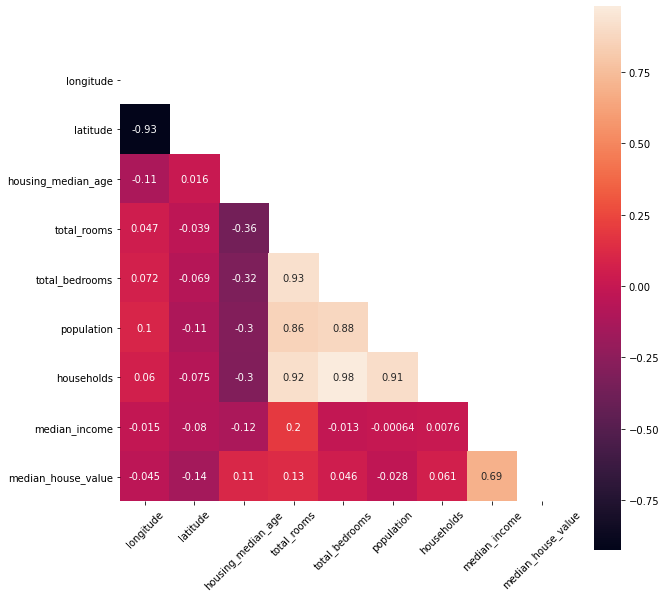

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),square=True,annot=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

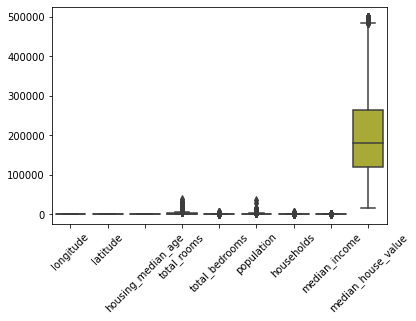

In [40]:
sns.boxplot(data=df)
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


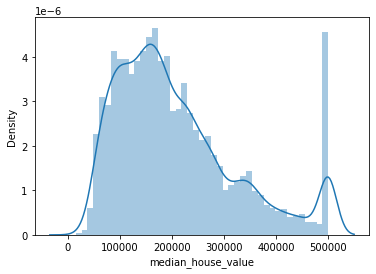

In [41]:
sns.distplot(df['median_house_value'])

In [42]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)
get_run_logdir()

'./my_logs/run_2021_06_20-16_57_43'

In [43]:


features = df.copy()
target = features.pop("median_house_value")
from sklearn.preprocessing import *
rob = RobustScaler() # normalizes shape
rob_features = rob.fit_transform(features)

sc = StandardScaler() # scales
sc_features = sc.fit_transform(rob_features)
sc_features.mean()

-1.5046787345508003e-17

In [44]:
X_train_full, X_test, y_train_full, y_test = train_test_split(sc_features,target,test_size=.33,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
# X_test_scaled = scaler.transform(X_test)

In [45]:
X_train.shape

(8542, 8)

# ML Model

In [46]:

from sklearn.linear_model import *
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#evaluate the model (intercept and slope)


In [47]:
print(lr.intercept_)
print(lr.coef_)

206462.3488920716
[-86250.37333387 -92133.68386882  14187.92527905 -16879.56966517
  43343.42334263 -44569.66785679  21575.68764976  76888.09129495]


#predicting the test set result


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


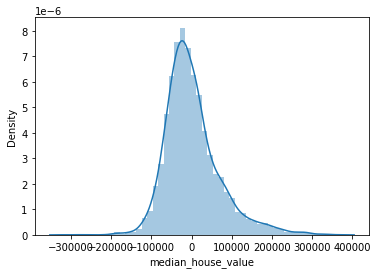

In [48]:
y_pred = lr.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(lr.coef_, df.drop('median_house_value',axis =1).columns, columns=['Coefficient']) 
coeff_df
sns.distplot((y_test-y_pred))

# evaluate the performance of the algorithm (MAE - MSE - RMSE)


In [49]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print("r2: ",metrics.r2_score(y_test,y_pred))

MAE: 50671.08389873943
MSE: 4765340390.777376
RMSE: 69031.44494197826
VarScore: 0.6533652998697276
r2:  0.6530289897394992


## Keras Model

In [50]:
model = Sequential()


In [51]:
model.add(Dense(20,activation="elu",input_dim=8))
model.add(Dense(10,activation="elu"))
model.add(Dense(5,activation="elu"))


In [52]:
model.add(Dense(1))

In [53]:
model.compile(optimizer='adam',loss="mse")
run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

In [54]:
model.fit(X_train, y_train, callbacks=[tensorboard_cb] , epochs=200 , validation_data=(X_valid,y_valid))


Epoch 1/200
267/267 [==============================] - 2s 4ms/step - loss: 54934761991.6418 - val_loss: 56357756928.0000
Epoch 2/200
267/267 [==============================] - 1s 2ms/step - loss: 55372307486.5672 - val_loss: 55946330112.0000
Epoch 3/200
267/267 [==============================] - 1s 3ms/step - loss: 53759869096.1194 - val_loss: 54185312256.0000
Epoch 4/200
267/267 [==============================] - 1s 3ms/step - loss: 52431949151.5224 - val_loss: 49984450560.0000
Epoch 5/200
267/267 [==============================] - 1s 2ms/step - loss: 47983321408.9552 - val_loss: 42724298752.0000
Epoch 6/200
267/267 [==============================] - 1s 2ms/step - loss: 39673381314.8657 - val_loss: 33639694336.0000
Epoch 7/200
267/267 [==============================] - 1s 2ms/step - loss: 30237675038.5672 - val_loss: 25339209728.0000
Epoch 8/200
267/267 [==============================] - 1s 2ms/step - loss: 22989584811.9403 - val_loss: 20264861696.0000
Epoch 9/200
267/267 [===========

In [55]:
#get_ipython().system_raw('tensorboard --logdir=./my_logs --port=6006 &')

In [56]:
# os.system("pip install pyngrok")
# from pyngrok import ngrok
# print(ngrok.connect(6006,"http"))

In [57]:
# !tensorboard --logdir=./my_logs --port=6006

In [58]:
model.evaluate(X_test,y_test)

176/176 [==============================] - 0s 2ms/step - loss: 3972908288.0000


3972908288.0

In [59]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

print("r2: ",metrics.r2_score(y_test,y_pred))


MAE: 44791.949475511086
MSE: 3972908799.444148
RMSE: 63031.0145836488
VarScore: 0.7108729963040671
r2:  0.710727027499688


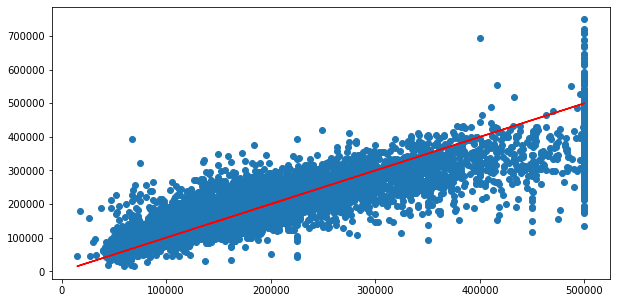

In [60]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')